# **End of Phase 1 Project Submission.**

* Student Name: PETER NJUGU MURAGE.
* Student Pace: Part Time.

### This Project is designed to test my understanding in Phase 0 and Phase 1 content of Data Science Course.

### Specifically, this will cover:
     1. Business Understanding.
     2. Data Understanding.
     3. Data Exploration.
     4. Data Cleaning.
     5. Data Analysis.
     6. Data Visualization.


## **Project Overview.**

My main task in this poject is to use Exploratory Data Analysis to generate insights for MicroSoft to help them make an informed decision as they venture in creating a new movie studio. I will be exploring various datasets such as The Numbers and Rotten Tomatoes. I will also perform several visualizations to enable me make reommendation that will in turn help Microsoft decide on what type of movie to create.

## **Business Understanding/Problem.**

Microsoft want to create a new movie studio. They are unsure on where to start. I will be exploring on what type of films are currently doing the best at the Box office. This will enable me to make recommendations about attributes that Microsoft's movies should have in order to attain the highest revenue.

### I will base my analysis on the following factors;
1. Movie genre: What type of movie content are currently most successful?
2. Production budget: What budget amount tends to achieve the highest box office gross?
3. Released date: When is the best time of the year to release a movie?

## **Data Understanding.**

##### I utilized three different data sources for my analysis in order to have the most comprehensive view of the industry as it currently is.
### These data sets include
1. **The Numbers** - 
2. **Rotten Tomatoes** -



### **Importing Relevant Libraries.**

In [101]:
#Importing Relevant Python Libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# **1. The Numbers Dataset.**

## **Data Preparation/Exploration.**

In [102]:
#reading the csv file.
df_TheNumbers = pd.read_csv('datasets/tn.movie_budgets.csv')
#displaying the first ten rows of the dataframe.
df_TheNumbers.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


There is need to convert the currencies for better and clearer view and analysis.

In [103]:
# Converting the currencies.

def sanitise(amt: str):
    """Strips out the currency symbol and commas, then casts to number."""
    if amt is None or amt == "":
        return None

    amt = amt.lstrip("$").replace(",", "")

    return int(amt)


conv = {
    "production_budget": sanitise,
    "domestic_gross": sanitise,
    "worldwide_gross": sanitise,
}

In [104]:
df_TheNumbers = pd.read_csv('datasets/tn.movie_budgets.csv',
                           usecols=[1, 2, 3, 4, 5], parse_dates=['release_date'], converters=conv)
# displaying the first 10 rows of the dataset
df_TheNumbers.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
7,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,2017-11-17,Justice League,300000000,229024295,655945209
9,2015-11-06,Spectre,300000000,200074175,879620923


In [105]:
# sorting the dataset with respect to the worlwide_gross column

df_TheNumbers.sort_values(by='worldwide_gross',
                         ascending=False, ignore_index=True, inplace=True)
df_TheNumbers.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,1997-12-19,Titanic,200000000,659363944,2208208395
2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
4,2015-06-12,Jurassic World,215000000,652270625,1648854864
5,2015-04-03,Furious 7,190000000,353007020,1518722794
6,2012-05-04,The Avengers,225000000,623279547,1517935897
7,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
8,2018-02-16,Black Panther,200000000,700059566,1348258224
9,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


In [106]:
df_TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 226.0+ KB


In [107]:
#Doing some stastical analysis on the dataframe
df_TheNumbers.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


In [108]:
# getting counts for each value in production_budget column
df_TheNumbers['production_budget'].value_counts()

20000000     231
10000000     212
30000000     177
15000000     173
25000000     171
            ... 
10350000       1
149000000      1
1650000        1
205000000      1
22700000       1
Name: production_budget, Length: 509, dtype: int64

In [109]:
# getting counts for each value in release_date column
df_TheNumbers['release_date'].value_counts()

2014-12-31    24
2015-12-31    23
2010-12-31    15
2008-12-31    14
2009-12-31    13
              ..
1988-06-10     1
1991-11-13     1
1927-08-12     1
1987-03-13     1
1929-02-01     1
Name: release_date, Length: 2418, dtype: int64

## **Data Cleaning.**

In this section, I have performed some cleaning on the data to drop all missing values and duplicates values.

In [110]:
# Dropping missing values in the df
df_TheNumbers.dropna(inplace=True)

# Checking for missing values
df_TheNumbers.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [111]:
#removing the duplicate values
df_TheNumbers.duplicated().sum()

0

### **Feature Creation.**

We'll generate some new variables from the existsing data. To do this we will:

- Breakdown `release_date` to obtain the year, month, quarter and season.
- Obtain the difference in `worldwide_gross` and `production_budget` to get the profit.

Seasons in the Northern Hemisphere:
|Season|Months|
|--|--|
Spring | March, April, May
Summer | June, July, August
Fall (autumn) | September, October, November
Winter | December, January, February

In [112]:
df_TheNumbers['release_year'] = df_TheNumbers.release_date.dt.year
df_TheNumbers['release_month'] = df_TheNumbers.release_date.dt.month
df_TheNumbers['release_quarter'] = df_TheNumbers.release_date.dt.quarter

cond = [df_TheNumbers.release_month.between(3, 5),
        df_TheNumbers.release_month.between(6, 8),
        df_TheNumbers.release_month.between(9, 11),
        df_TheNumbers.release_month.isin([12, 1, 2])]
season = ['spring', 'summer', 'fall', 'winter']
df_TheNumbers['season'] = np.select(cond, season)

df_TheNumbers['profit'] = df_TheNumbers.worldwide_gross - \
    df_TheNumbers.production_budget

df_TheNumbers.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_quarter,season,profit
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,4,winter,2351345279
1,1997-12-19,Titanic,200000000,659363944,2208208395,1997,12,4,winter,2008208395
2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,12,4,winter,1747311220
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,4,2,spring,1748134200
4,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,6,2,summer,1433854864
5,2015-04-03,Furious 7,190000000,353007020,1518722794,2015,4,2,spring,1328722794
6,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,5,2,spring,1292935897
7,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,2,spring,1072413963
8,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,2,1,winter,1148258224
9,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011,7,3,summer,1216693157


## **Data Analysis.**

### **(a) Time Range.**

In [113]:
df_TheNumbers.release_year.describe()

count    5782.000000
mean     2003.967139
std        12.724386
min      1915.000000
25%      2000.000000
50%      2007.000000
75%      2012.000000
max      2020.000000
Name: release_year, dtype: float64

### **Visualizing this data.**

<AxesSubplot:title={'center':'Release Year Histogram'}, ylabel='Frequency'>

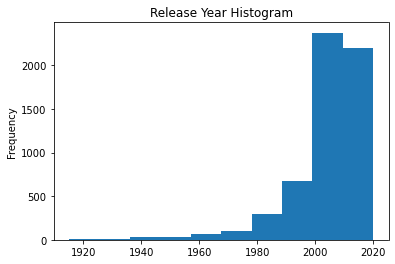

In [114]:
df_TheNumbers.release_year.plot.hist(
    ylabel="Movies Released", xlabel="Year", title="Release Year Histogram"
)

When we investigate the range of data we have, we find that the release date range of movies is 1915-2020, with a larger percentage in the years after 1990. We can discard the older records. In any case, cinema dynamics would be vastly different from back then.

In [115]:
df_TheNumbers = df_TheNumbers.query("release_year >= 1990")
df_TheNumbers.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,release_quarter,season,profit
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12,4,winter,2351345279
1,1997-12-19,Titanic,200000000,659363944,2208208395,1997,12,4,winter,2008208395
2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,12,4,winter,1747311220
3,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,4,2,spring,1748134200
4,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,6,2,summer,1433854864
5,2015-04-03,Furious 7,190000000,353007020,1518722794,2015,4,2,spring,1328722794
6,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,5,2,spring,1292935897
7,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,2,spring,1072413963
8,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,2,1,winter,1148258224
9,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011,7,3,summer,1216693157


### **(b) Seasons.**

In [116]:
df_TheNumbers.season.value_counts()

fall      1430
winter    1325
summer    1242
spring    1213
Name: season, dtype: int64

### **Visualizing this data.**

<AxesSubplot:xlabel='release_year', ylabel='Count'>

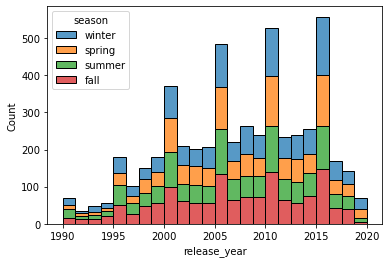

In [117]:
sns.histplot(
    df_TheNumbers,
    x="release_year",
    hue="season",
    multiple="stack",
)

Movies seem to have a somewhat consistent output through the year. So how do they perform?

In [118]:
df_season_stats = df_TheNumbers.groupby(['season'], as_index=False).agg({'movie': 'count',
                                                                        'profit': ['sum', 'median', 'mean']})

df_season_stats                                                                       

season movie        profit                          
          count           sum      median          mean
0    fall  1430   70246812638   5721871.5  4.912365e+07
1  spring  1213   80165950723   7317066.0  6.608899e+07
2  summer  1242  100020644168  14902881.5  8.053192e+07
3  winter  1325   70644781551   5943792.0  5.331682e+07

array([<AxesSubplot:title={'center':'sum'}, xlabel='season'>,
       <AxesSubplot:title={'center':'median'}, xlabel='season'>,
       <AxesSubplot:title={'center':'mean'}, xlabel='season'>],
      dtype=object)

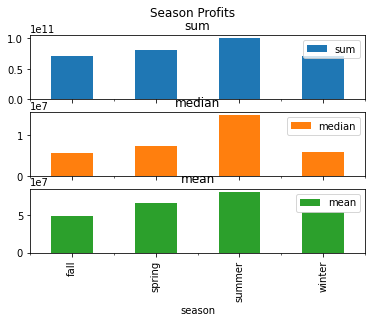

In [119]:
df_season_stats.plot(
    x="season", y="profit", kind="bar", subplots=True, title="Season Profits"
)

Summer seems to be a good time for movies, with fall/winter being less profitable.

### **(c) Months.**

In [155]:
df_month_stats = df_TheNumbers.groupby('release_month', as_index=False).agg(
    {'movie': 'count', 'profit': 'median', 'worldwide_gross': 'sum'})

In [156]:
df_month_stats.head()

,release_month,movie,profit,worldwide_gross
0,1,301,5322212.0,15385882237
1,2,361,10502976.0,26907601487
2,3,436,7731684.0,36393390271
3,4,418,4320646.0,26285658062
4,5,359,12970660.0,60891208645


In [158]:
sns.barplot(df_month_stats, x='release_month', y='profit', orient='x')

ValueError: Could not interpret input 'profit'

### **(d) Production Budget.**

In [122]:
sns.lmplot(df_TheNumbers, x="production_budget", y="profit")

TypeError: Invalid comparison between dtype=datetime64[ns] and str

## **2. Rotten Tomatoes Dataset.**

In [124]:
# reading the file
df_RottenTomatoes = pd.read_csv("datasets/rt.movie_info.tsv", sep="\t")
#displaying the first ten rows of the dataframe.
df_RottenTomatoes.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [128]:
def extract_runtime(runtime: str):
    """"""
    try:
        return int(runtime.split()[0])
    except:
        pass


df_RottenTomatoes = pd.read_csv('datasets/rt.movie_info.tsv', sep='\t',
                        usecols=[2, 3, 4, 6, 7, 9, 10],
                        parse_dates=['theater_date', 'dvd_date'],
                        converters={'box_office': sanitise,
                                    'runtime': extract_runtime})
df_RottenTomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rating        1557 non-null   object        
 1   genre         1552 non-null   object        
 2   director      1361 non-null   object        
 3   theater_date  1201 non-null   datetime64[ns]
 4   dvd_date      1201 non-null   datetime64[ns]
 5   box_office    340 non-null    float64       
 6   runtime       1530 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 85.4+ KB


In [132]:
df_RottenTomatoes.head(10)

,rating,genre,director,theater_date,dvd_date,box_office,runtime
0,R,Action and Adventure|Classics|Drama,William Friedkin,1971-10-09,2001-09-25,NaN,104.0
1,R,Drama|Science Fiction and Fantasy,David Cronenberg,2012-08-17,2013-01-01,600000.0,108.0
2,R,Drama|Musical and Performing Arts,Allison Anders,1996-09-13,2000-04-18,NaN,116.0
3,R,Drama|Mystery and Suspense,Barry Levinson,1994-12-09,1997-08-27,NaN,128.0
4,NR,Drama|Romance,Rodney Bennett,NaT,NaT,NaN,200.0
5,PG,Drama|Kids and Family,Jay Russell,2000-03-03,2000-07-11,NaN,95.0
6,PG-13,Comedy,Jake Kasdan,2002-01-11,2002-06-18,41032915.0,82.0
7,R,Drama,Ray Lawrence,2006-04-27,2007-10-02,224114.0,123.0
8,R,Drama,Taylor Hackford,2010-06-30,2010-11-09,134904.0,117.0
9,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,1995-06-09,1999-07-27,NaN,108.0


In [133]:
df_RottenTomatoes.isna().sum()

rating             3
genre              8
director         199
theater_date     359
dvd_date         359
box_office      1220
runtime           30
dtype: int64

We discard records without the box office earnings.

In [135]:
df_RottenTomatoes = df_RottenTomatoes.drop_duplicates().dropna(
    axis=0, subset=['box_office']).reset_index(drop=True)

df_RottenTomatoes.head(10)

,rating,genre,director,theater_date,dvd_date,box_office,runtime
0,R,Drama|Science Fiction and Fantasy,David Cronenberg,2012-08-17,2013-01-01,600000.0,108.0
1,PG-13,Comedy,Jake Kasdan,2002-01-11,2002-06-18,41032915.0,82.0
2,R,Drama,Ray Lawrence,2006-04-27,2007-10-02,224114.0,123.0
3,R,Drama,Taylor Hackford,2010-06-30,2010-11-09,134904.0,117.0
4,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,2010-12-17,2011-04-05,1039869.0,108.0
5,R,Drama,NaN,2013-12-20,2014-03-18,99165609.0,129.0
6,PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,2013-12-25,2014-04-01,20518224.0,127.0
7,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,2004-05-14,2004-09-21,1971135.0,96.0
8,R,Drama,John Sayles,2003-09-19,2004-04-13,312136.0,95.0
9,R,Drama,Ken Loach,2003-05-16,2003-10-07,201010.0,106.0


### **(a) Rating.**

We check how the movie's content rating relates to its performance at the box office.

In [136]:
df_RottenTomatoes.groupby(["rating"])["box_office"].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
G,9.0,3.044796e+07,4.064344e+07,598103.0,2782548.00,16302332.0,19000000.00,106604314.0
NC17,1.0,1.260219e+06,NaN,1260219.0,1260219.00,1260219.0,1260219.00,1260219.0
NR,19.0,2.486249e+06,7.227890e+06,363.0,185921.50,480926.0,1368097.00,32000000.0
PG,52.0,5.103356e+07,6.044222e+07,118253.0,5514326.50,31260078.5,72626284.75,261835892.0
PG-13,116.0,5.682722e+07,6.914500e+07,2367.0,10444798.00,32370798.0,80719925.25,303001229.0
R,142.0,2.323176e+07,4.320190e+07,8300.0,1009967.25,6471411.0,27371138.75,368000000.0


PG-13 and R are the most common content ratings with PG-13 movies doing better as a whole at the box office.

In [137]:
sns.boxplot(df_RottenTomatoes, x='rating', y='box_office').set(title='Box Office Earnings Distribution by Rating',
                                                       xlabel='Content Rating', ylabel='Earnings', yticklabels=[])

plt.show()

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'box_office'

### **(b) Runtime.**

In [ ]:
sns.scatterplot(df_rt_mov, x="runtime", y="box_office", hue="rating")

### **(c) Genre.**

In [144]:
df_RottenTomatoes.genre.describe()

count       339
unique      100
top       Drama
freq         48
Name: genre, dtype: object

Split up the genres on `|` and create new rows. This will allow us view each genre on its own.

In [146]:
df_RottenTomatoes["genre"] = df_RottenTomatoes.genre.str.split(pat="|")
df_rt_genres = df_RottenTomatoes.explode("genre")

In [147]:
df_rt_genres.head(20)

,rating,genre,director,theater_date,dvd_date,box_office,runtime
0,R,Drama,David Cronenberg,2012-08-17,2013-01-01,600000.0,108.0
0,R,Science Fiction and Fantasy,David Cronenberg,2012-08-17,2013-01-01,600000.0,108.0
1,PG-13,Comedy,Jake Kasdan,2002-01-11,2002-06-18,41032915.0,82.0
2,R,Drama,Ray Lawrence,2006-04-27,2007-10-02,224114.0,123.0
3,R,Drama,Taylor Hackford,2010-06-30,2010-11-09,134904.0,117.0
4,R,Comedy,George Hickenlooper,2010-12-17,2011-04-05,1039869.0,108.0
4,R,Drama,George Hickenlooper,2010-12-17,2011-04-05,1039869.0,108.0
4,R,Mystery and Suspense,George Hickenlooper,2010-12-17,2011-04-05,1039869.0,108.0
5,R,Drama,NaN,2013-12-20,2014-03-18,99165609.0,129.0
6,PG-13,Action and Adventure,Carl Erik Rinsch,2013-12-25,2014-04-01,20518224.0,127.0


In [148]:
ax = sns.violinplot(df_rt_genres, x='genre', y='box_office',
                    hue='genre', inner='quart')
ax.tick_params(axis='x', labelrotation=90)

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'box_office'

Interesting points:

- Science Fiction and Fantasy
- Action and Adventure
- Kids and Family
- Animation


### Box Office Run

Here we will look into any relationship between how long movies stayed in theatre before release on DVD with the earnings.

In [150]:
df_RottenTomatoes["box_office_run"] = df_RottenTomatoes.dvd_date - df_RottenTomatoes.theater_date
df_RottenTomatoes.head(10)

,rating,genre,director,theater_date,dvd_date,box_office,runtime,box_office_run
0,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,2012-08-17,2013-01-01,600000.0,108.0,137 days
1,PG-13,[Comedy],Jake Kasdan,2002-01-11,2002-06-18,41032915.0,82.0,158 days
2,R,[Drama],Ray Lawrence,2006-04-27,2007-10-02,224114.0,123.0,523 days
3,R,[Drama],Taylor Hackford,2010-06-30,2010-11-09,134904.0,117.0,132 days
4,R,"[Comedy, Drama, Mystery and Suspense]",George Hickenlooper,2010-12-17,2011-04-05,1039869.0,108.0,109 days
5,R,[Drama],NaN,2013-12-20,2014-03-18,99165609.0,129.0,88 days
6,PG-13,"[Action and Adventure, Drama, Science Fiction ...",Carl Erik Rinsch,2013-12-25,2014-04-01,20518224.0,127.0,97 days
7,R,"[Art House and International, Comedy, Drama, M...",Jim Jarmusch,2004-05-14,2004-09-21,1971135.0,96.0,130 days
8,R,[Drama],John Sayles,2003-09-19,2004-04-13,312136.0,95.0,207 days
9,R,[Drama],Ken Loach,2003-05-16,2003-10-07,201010.0,106.0,144 days


In [151]:
df_RottenTomatoes.box_office_run.describe()

count                             333
mean      297 days 23:55:40.540540540
std      1268 days 20:24:40.807379120
min                  46 days 00:00:00
25%                 109 days 00:00:00
50%                 130 days 00:00:00
75%                 158 days 00:00:00
max               17472 days 00:00:00
Name: box_office_run, dtype: object

The max value seems to be an anomaly. We would expect runs not longer than 6 months. We will limit records to about 6 months.

In [152]:
df_RottenTomatoes.sort_values(by="box_office_run", ascending=False).head(10)

,rating,genre,director,theater_date,dvd_date,box_office,runtime,box_office_run
244,NR,"[Art House and International, Drama, Mystery a...",Louis Malle,1958-06-24,2006-04-25,109257.0,92.0,17472 days
143,R,"[Action and Adventure, Comedy, Drama]",Richard Rush,1974-12-25,2011-01-11,8300.0,114.0,13166 days
279,PG-13,"[Action and Adventure, Drama, Western]",Lawrence Kasdan,1985-01-01,1999-05-31,33200000.0,133.0,5263 days
250,R,"[Action and Adventure, Drama, Mystery and Susp...",Paul Verhoeven,1990-06-01,2000-08-29,119000000.0,113.0,3742 days
98,G,"[Documentary, Special Interest]",Adam Ravetch|Sarah Robertson,2007-08-17,2017-08-01,598103.0,86.0,3637 days
293,NR,[Drama],Claude Gagnon,1992-02-06,2001-06-19,32000000.0,113.0,3421 days
170,PG-13,"[Action and Adventure, Mystery and Suspense, S...",Steven Spielberg,1993-06-11,2000-10-10,45299680.0,126.0,2678 days
191,PG,"[Animation, Kids and Family, Science Fiction a...",Henry Selick|Tim Burton,1993-10-24,1997-12-02,8616662.0,76.0,1500 days
102,R,"[Horror, Mystery and Suspense, Science Fiction...",James Isaac,2002-04-26,2004-06-01,12610731.0,91.0,767 days
120,R,"[Art House and International, Comedy, Drama]",Vincent Gallo,1998-06-26,2000-02-01,2365931.0,110.0,585 days


In [153]:
df_rt_run = df_RottenTomatoes.query("box_office_run.dt.days <= 200")
df_rt_run["run_days"] = df_rt_run.box_office_run.dt.days

<ipython-input-153-53ad8847c903>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_run["run_days"] = df_rt_run.box_office_run.dt.days


In [154]:
sns.relplot(df_rt_run, x="run_days", y="box_office").set(
    title="Days to DVD vs Earnings",
    ylabel="Bpx Office Earnings",
    yticklabels=[],
    xlabel="Days",
)

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `box_office` for parameter `y`

Movies that were in theater for 90 Days before DVD have higher box office returns.